In [258]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import skew 
%matplotlib inline

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Loading the data from the CSV file
1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings (15 marks)

In [259]:
dataframe = pd.read_csv("./Bank_Personal_Loan_Modelling.csv",index_col=False)

In [260]:
dataframe.shape

(5000, 14)

In [261]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [262]:
dataframe.isnull().sum() # No null values observeed in the dataframe

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [263]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [264]:
#Replacing negative value with mean in Experiance column
print((dataframe['Experience']<0).sum())  #Before negative vaue cleaning
for i in range(len(dataframe)):
    if(dataframe.iloc[i]['Experience'] < 0):
        dataframe["Experience"].replace(dataframe.iloc[i]['Experience'], value =dataframe["Experience"].mean(),inplace=True) 
dataframe.head(93)
print((dataframe['Experience']<0).sum()) #After cleaning the negative value

52
0


In [265]:
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [266]:
# Column descriptions

##  Data                Description
##  ID                  Customer ID
##  Age                 Customer's age in completed years
##  Experience          #years of professional experience
##  Income              Annual income of the customer ($000)
##  ZIPCode             Home Address ZIP code.
##  Family              Family size of the customer
##  CCAvg               Avg. spending on credit cards per month ($000)
##  Education           Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##  Mortgage            Value of house mortgage if any. ($000)
##  Personal Loan       Did this customer accept the personal loan offered in the last campaign?
##  Securities Account  Does the customer have a securities account with the bank?
##  CD Account          Does the customer have a certificate of deposit (CD) account with the bank?
##  Online              Does the customer use internet banking facilities?
##  CreditCard          Does the customer use a credit card issued by UniversalBank?

In [267]:
selected_data = dataframe.iloc[:,1:13]
selected_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,92697,1,1.9,3,0,0,0,0,1
4996,30,4.0,15,92037,4,0.4,1,85,0,0,0,1
4997,63,39.0,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40.0,49,90034,3,0.5,2,0,0,0,0,1


<function matplotlib.pyplot.show(*args, **kw)>

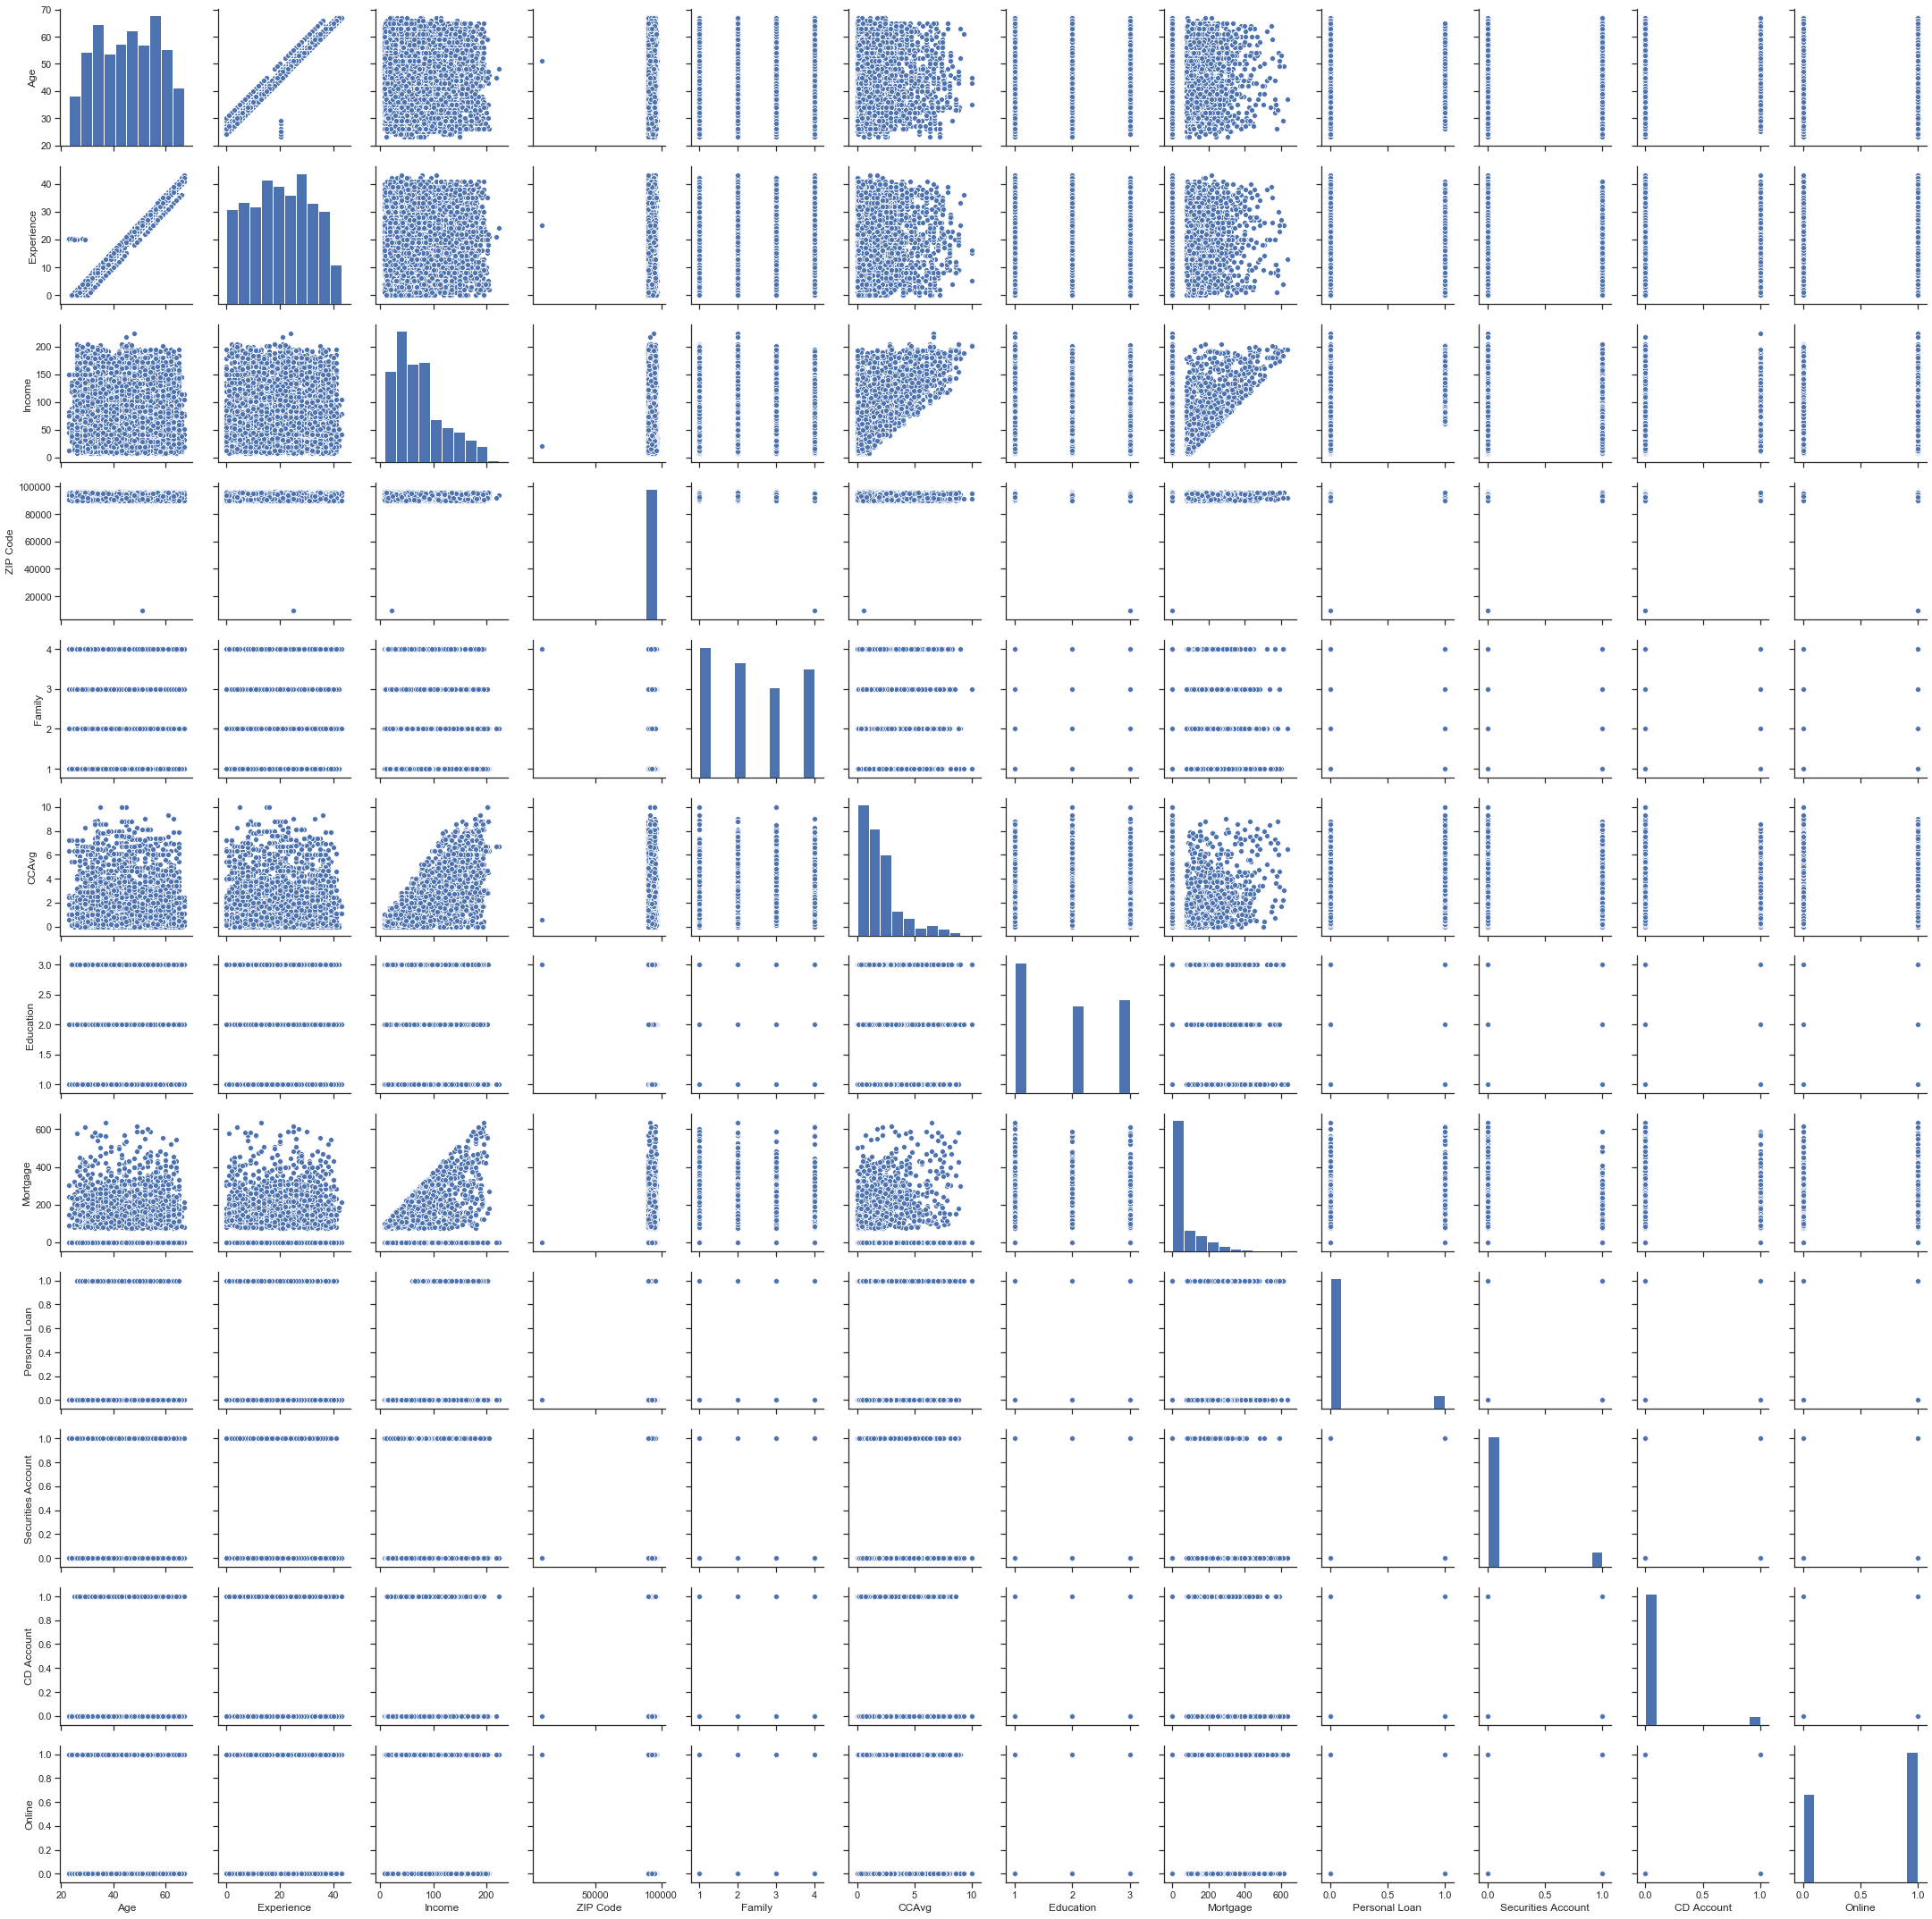

In [268]:
sns.set(style='ticks')
sns.pairplot(selected_data)
plt.show

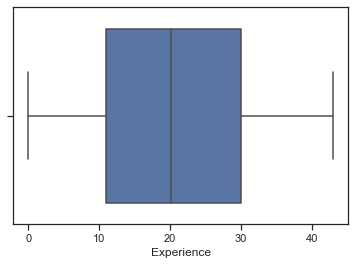

In [269]:
#Observations
#Age and Experiance are highly correlated
#Age & Income has no liner relationship
#Age & Experience has no linear relationship

#Checking the imporatant columns by Box plot
#Chcking for outliers with Different attributes
sns.boxplot(dataframe['Experience'])

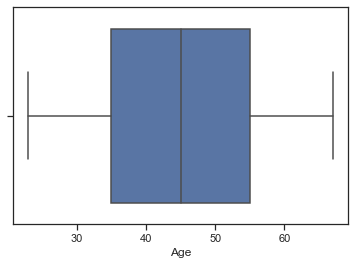

In [270]:
sns.boxplot(dataframe['Age'])

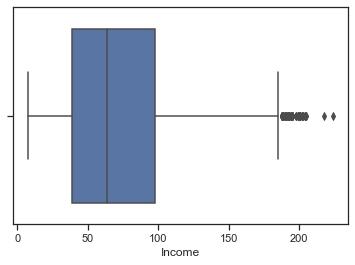

In [271]:
sns.boxplot(dataframe['Income'])

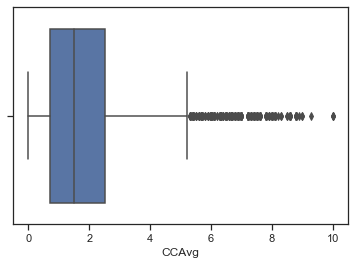

In [272]:
sns.boxplot(dataframe['CCAvg'])

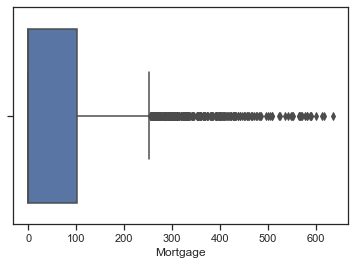

In [273]:
sns.boxplot(dataframe['Mortgage'])

In [274]:
dataframe.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [275]:
#Seperating dependent & independent variables and stroring them
x_dataframe = dataframe.loc[:,dataframe.columns != 'Personal Loan']  # independent variable
y_dataframe = dataframe.loc[:,dataframe.columns == 'Personal Loan']  # depend variable

3. Get the target column distribution. Your comments (5 marks) 

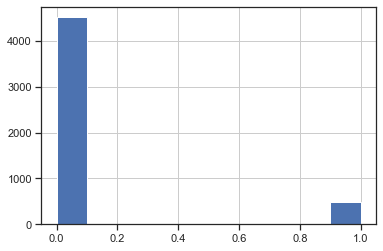

In [276]:
# Here the target colummn is Personal Loan
# Using different plots for finding the distribution
targetColumn = dataframe['Personal Loan']
targetColumn.hist()
val = targetColumn.values

In [277]:
#Skness of the attribute 
skew(targetColumn)

2.74278350529752

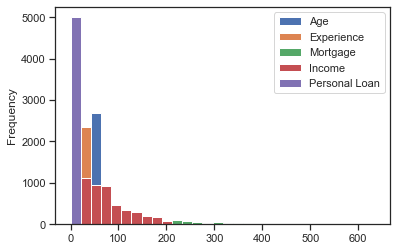

In [278]:
dataframe[["Age","Experience","Mortgage","Income","Personal Loan"]].plot(bins=30, kind="hist")

# Model Creation

In [279]:
features=x_dataframe.loc[:, 'Age':'CreditCard']
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_dataframe.values


In [280]:
features

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4.0,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39.0,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40.0,49,90034,3,0.5,2,0,0,0,1,0


# 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 

In [281]:
#Splitting the data for testing & training
test_size = 0.30 
X_train,X_test,Y_train,Y_test = train_test_split(features_array,target_labels,test_size = test_size,random_state = 1)
Y_train = np.ravel(Y_train) 
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

# Logistic Regression

In [282]:
#Logistic regression based predition

model = LogisticRegression()
model.fit(X_train,Y_train)

model_score = model.score(X_test, Y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
logY_test = Y_test
logY_predict = y_predict

0.9073333333333333
[[1318   33]
 [ 106   43]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [283]:
# summarize the fit of the model
print(metrics.classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



# Naive Bayes Model

In [284]:
features = x_dataframe.iloc[:,1:13]

target_labels = dataframe.loc[:, dataframe.columns == 'Personal Loan']


X_array = features.values
y_array = target_labels.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array


In [285]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))
naiveY_test = y_test
naiveY_predict = predictions

[[1653  163]
 [  79  105]]


In [286]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1816
           1       0.39      0.57      0.46       184

    accuracy                           0.88      2000
   macro avg       0.67      0.74      0.70      2000
weighted avg       0.90      0.88      0.89      2000



# KNN Model

In [287]:

NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [288]:
predicted_labels = NNH.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
knn_Ytest = y_test
knn_Ypredict = predicted_labels

[[1748   68]
 [ 133   51]]


In [289]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1816
           1       0.43      0.28      0.34       184

    accuracy                           0.90      2000
   macro avg       0.68      0.62      0.64      2000
weighted avg       0.88      0.90      0.89      2000



In [290]:
# Converting the dimensions in to Z score 
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [291]:
predicted_labels = NNH.predict(X_test_scaled)

In [292]:
print(metrics.confusion_matrix(y_test, predicted_labels))
knY_test = y_test
knY_predict = predicted_labels

[[1805   11]
 [  69  115]]


In [293]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1816
           1       0.91      0.62      0.74       184

    accuracy                           0.96      2000
   macro avg       0.94      0.81      0.86      2000
weighted avg       0.96      0.96      0.96      2000



# 6. Print the confusion matrix for all the above model

In [294]:
#Confusion Matrix for Logistic regression
print(metrics.confusion_matrix(logY_test, logY_predict))

[[1318   33]
 [ 106   43]]


In [295]:
#Confusion Matrix for Naive Bayes Model
print(metrics.confusion_matrix(naiveY_test, naiveY_predict))

[[1653  163]
 [  79  105]]


In [296]:
# Confusion Matrix for KNN
# Before Scaling
print(metrics.confusion_matrix(knn_Ytest, knn_Ypredict))

[[1748   68]
 [ 133   51]]


In [297]:
# Confusion Matrix for KNN
# Before After scaling
print(metrics.confusion_matrix(knY_test, knY_predict))

[[1805   11]
 [  69  115]]


# 7. Give your reasoning on which is the best model in this case and why it performs 

In [298]:
# Here as per the observations from the model the accuracy of the logistic regression & KNN is good
# but comparing the last model which is KNN with Scaled values gives the highest accurate model compared to others

# Comparing the first 3 models Logistic regression is giving less false predictions as per confusion matrix
# Classification models does have better accuracy with logisitic regression here.